# 04 - Image Plotting

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('data/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('data/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('data/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

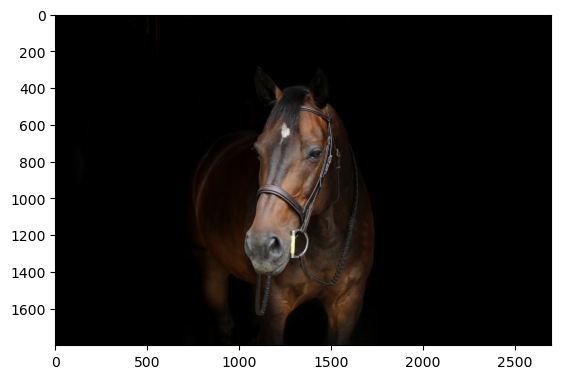

In [3]:
plt.imshow(show_horse)

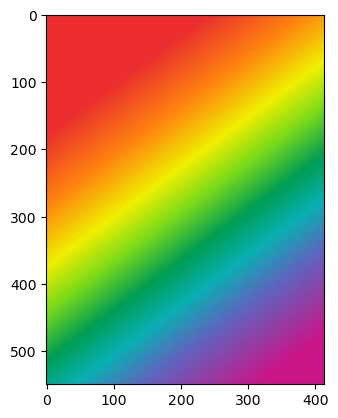

In [4]:
plt.imshow(show_rainbow)

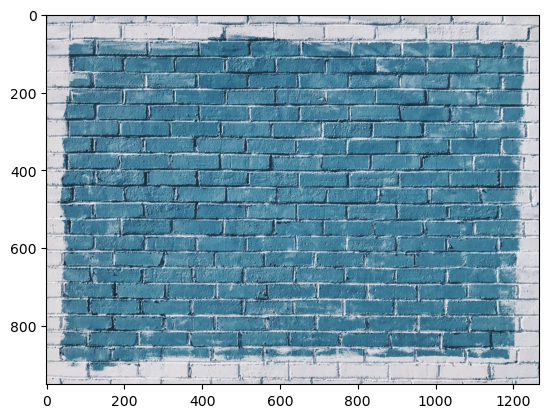

In [5]:
plt.imshow(show_bricks)

In [6]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])
hist_values.shape

(256, 1)

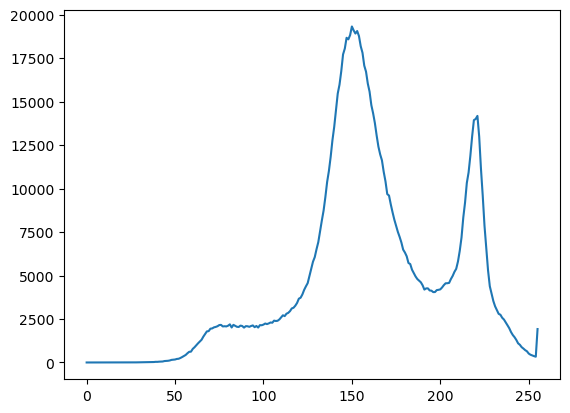

In [7]:
plt.plot(hist_values)

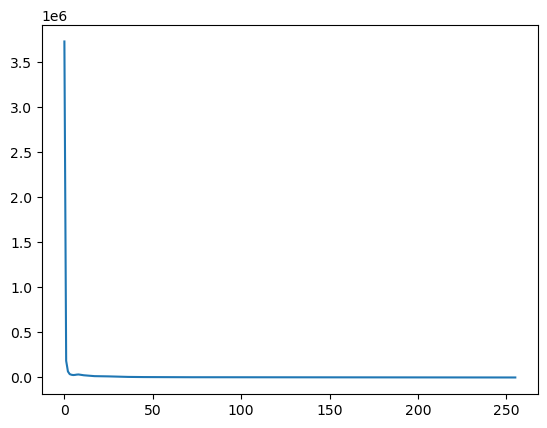

In [8]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

In [10]:
img = blue_bricks
colors = ('b','g','r')
for i,color in enumerate(colors):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=color)
    plt.xlim([0,256])

plt.title('HISTOGRAM FOR BLUE BRICKS')

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

In [13]:
img = show_horse
colors = ('b','g','r')
for i,color in enumerate(colors):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color=color)
    plt.xlim([0,50])

plt.title('HISTOGRAM FOR BLUE BRICKS')

Text(0.5, 1.0, 'HISTOGRAM FOR BLUE BRICKS')

## Histogram Equalization

Histogram Equalization is a method of contrast adjustment based on the image's histogram.

In [17]:
import numpy as np
img = rainbow
img.shape

(550, 413, 3)

In [20]:
mask = np.zeros(img.shape[:2],np.uint8)
plt.imshow(mask,cmap='gray')

In [21]:
mask[300:400,100:400] = 255

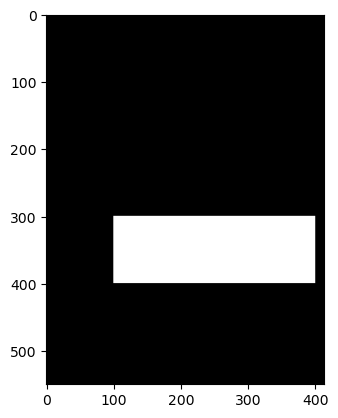

In [22]:
plt.imshow(mask,cmap='gray')

In [25]:
masked_img = cv2.bitwise_and(img,img,mask=mask)

In [26]:
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask=mask)

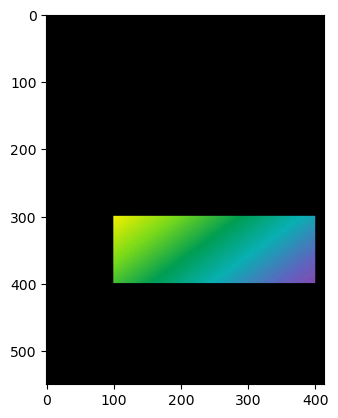

In [27]:
plt.imshow(show_masked_img)

In [28]:
hist_mask_values_red = cv2.calcHist([rainbow],channels=[2],mask=mask,histSize=[256],ranges=[0,256])

In [29]:
hist_values_red = cv2.calcHist([rainbow],channels=[2],mask=None,histSize=[256],ranges=[0,256])

In [30]:
plt.plot(hist_mask_values_red)
plt.title('RED HISTOGRAM FOR MASKED RAINBOW')

Text(0.5, 1.0, 'RED HISTOGRAM FOR MASKED RAINBOW')

Text(0.5, 1.0, 'RED HISTOGRAM FOR NORMAL RAINBOW')

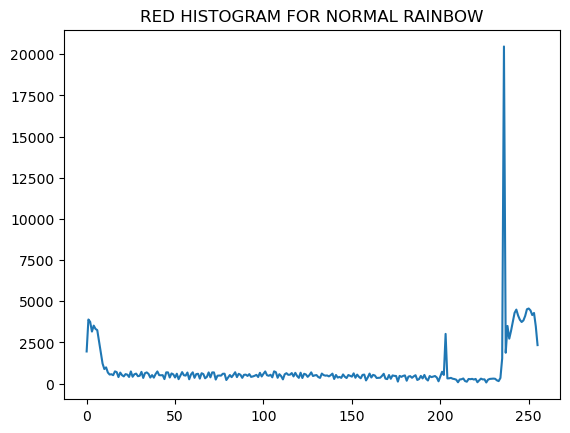

In [32]:
plt.plot(hist_values_red)
plt.title('RED HISTOGRAM FOR NORMAL RAINBOW')

In [33]:
gorilla = cv2.imread('data/gorilla.jpg',0)

In [34]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

In [35]:
display(gorilla,cmap='gray')

In [36]:
gorilla.shape

(1295, 1955)

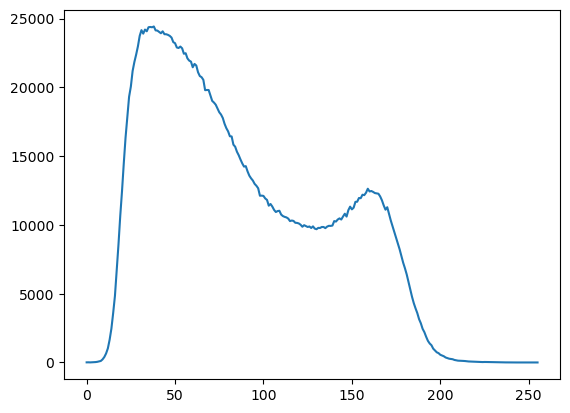

In [37]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist_values)

In [38]:
eq_gorilla = cv2.equalizeHist(gorilla)

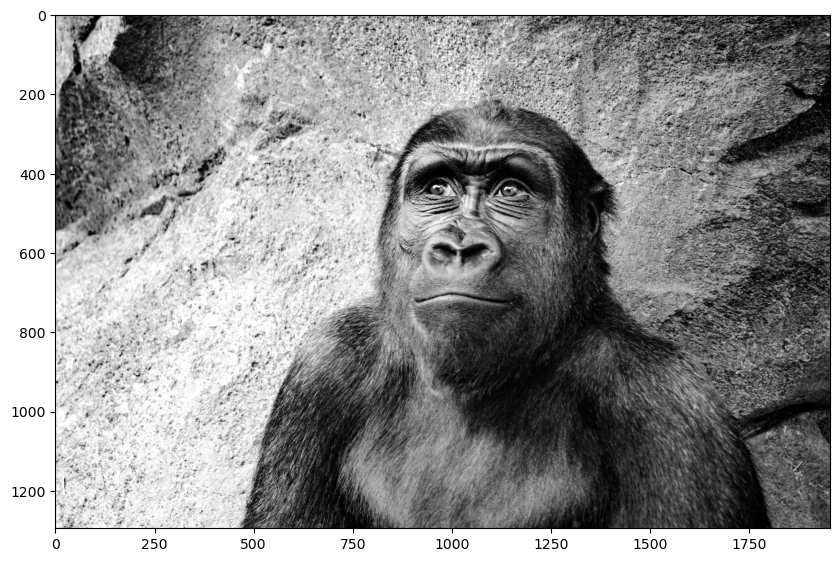

In [39]:
display(eq_gorilla,cmap='gray')